In [119]:
import os
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [120]:
problems = sorted(os.listdir("input"))

problems.remove("Waescher_TEST0082.txt")

### First-fit
Para cada item, o algoritmo first-fit inspeciona os pacotes, na ordem em que foram abertos, e insere o item no primeiro pacote que suporta o seu peso. Caso não exista um pacote que atenda essa restrição, um novo pacote é aberto pelo algoritmo.

In [87]:
def first_fit(w, itens):
    pacotes = [0]

    for item in itens:
        for idx, pacote in enumerate(pacotes):
            if item + pacote <= w:  # Se cabe no pacote
                pacotes[idx] += item  # Adiciona o item
                break  # Para de olhar por pacotes

            if idx == len(pacotes) - 1:
                pacotes.append(item)

    return len(pacotes)


### Next-fit
O algoritmo next-fit tenta enquadrar cada item no pacote mais recentemente aberto (inicia-se com um pacote aberto vazio). Caso o pacote não comporte o item a ser inserido, um novo pacote é aberto para a inclusão deste item.

In [88]:
def next_fit(w, p_itens):
    p_pacote = 0
    n_pacotes = 1

    for pi in p_itens:
        if p_pacote + pi < w:
            p_pacote += pi
        else:
            n_pacotes += 1
            p_pacote = pi
    return n_pacotes


### Best-fit
O algoritmo best-fit tenta enquadrar cada item no pacote com maior peso que suporte o peso do item, isto é, a soma dos pesos que já estava no pacote mais o peso do item a ser inserido não podem exceder a capacidade do pacote. Caso não exista pacote que atenda esta condição, um novo pacote é aberto pelo algoritmo para a inclusão do item

In [89]:
def best_fit(w, peso_itens ):
    pacotes = [0]

    for pi in peso_itens:
        idx_melhor_pacote = 0
        achou_pacote = False

        for idx, pacote in enumerate(pacotes):
            peso_restante = w - (pacote + pi)

            if (peso_restante>= 0) and (peso_restante < pacotes[idx_melhor_pacote]):
                idx_melhor_pacote = idx
                achou_pacote = True

            pacotes[idx] += pi

        if not achou_pacote:
            pacotes.append(pi)

    return len(pacotes)


### Análise da aproximação

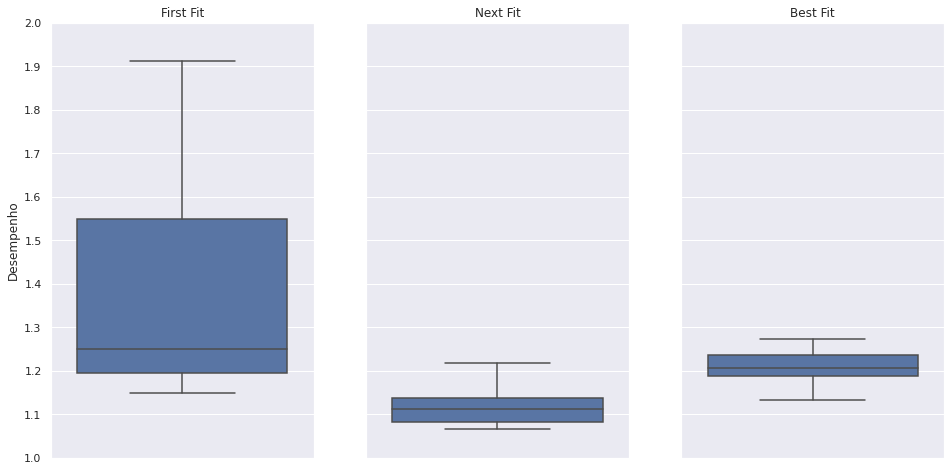

In [118]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 8), frameon=True)

res = {"First Fit": [], "Next Fit": [], "Best Fit": []}

for i, method in enumerate([first_fit, next_fit, best_fit]):
    perfs = []
    for problem in problems:
        optimal_solution, w, itens = get_problem_info(problem)

        resultado = method(w, itens)

        perf = round(resultado / optimal_solution, 3)
        perfs.append(perf)

    sns.boxplot(data=perfs, ax=ax[i])
    ax[i].set_title(list(res.keys())[i])

ax[0].set_ylabel("Desempenho")
plt.yticks(np.linspace(1, 2, num=11, endpoint=True))
plt.xticks([])
plt.show()